#Important Notes/Steps during ML workflows.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Adding an extra dimension to array.

In [2]:
X = np.linspace(0,10)
X.shape

(50,)

In [3]:
X = X[:,np.newaxis]

In [4]:
X.shape

(50, 1)

In [5]:
#This is important since the Feature Matrix must always be 2D.

# Validation Curves in SK-Learn.

> Important Learning : How to fit complex/high order polynomials in SK-Learn.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [55]:
def PolyReg(degree=2, **kwargs):

  P = make_pipeline(PolynomialFeatures(degree),
                    LinearRegression(**kwargs))
  
  return P


def datamaker( N=20,e=1):

  X = np.random.rand(N,1)**2

  #ravel is flattening.
  y = 10 - 1/(X.ravel() + 0.1)

  if e>0:
    y+=  e*np.random.randn(N)

  return X,y


In [76]:
X_train , y_train = datamaker(100,0.5)

### Fitting Polynomials of Different Degrees.

In [77]:
#Let's go with three models. 
#Model 1 = Degree 1

m1 = PolyReg(1).fit(X_train, y_train)

#Model 2 = Degree 3
m3 = PolyReg(3).fit(X_train,y_train)

#Model 3 = Degree 5
m5 = PolyReg(5).fit(X_train,y_train)

In [78]:
#Test Data. 
X_test = np.linspace(0,1,100).reshape(100,1)

In [79]:
#Predictions



yp1 = m1.predict(X_test) 
yp3 = m3.predict(X_test)
yp5 = m5.predict(X_test)

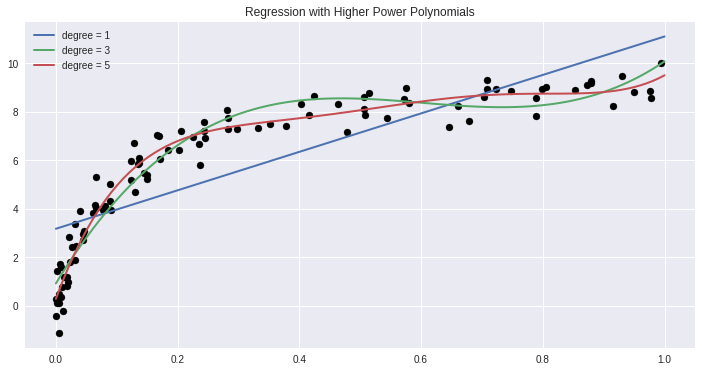

In [80]:
#Plotting
plt.figure(figsize=(12,6))
plt.style.use('seaborn')


plt.grid()
plt.scatter(X_train.ravel() , y_train, color='black')
plt.plot(X_test.ravel() , yp1 , lw=2, label='degree = 1')
plt.plot(X_test.ravel() , yp3 , lw=2, label='degree = 3')
plt.plot(X_test.ravel() , yp5 , lw=2, label='degree = 5')




plt.title('Regression with Higher Power Polynomials')
plt.legend()
plt.grid()

#Now let's plot training and validation curves over various degrees. 

In [81]:
from sklearn.model_selection import validation_curve, learning_curve, GridSearchCV

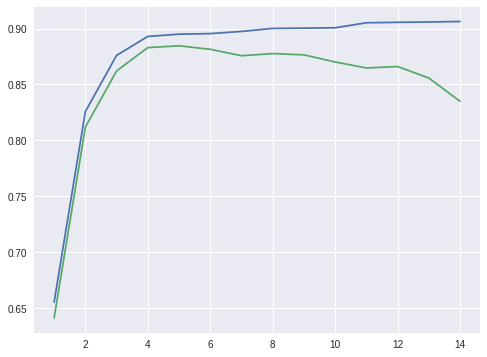

In [82]:
degree = np.arange(1,15)


X,y = datamaker(200)
train_score , val_score = validation_curve(PolyReg(), X, y,
                              'polynomialfeatures__degree',degree, cv=7)

tsm = [] ; vsm = []
for i in range(train_score.shape[0]):

  tsm.append(np.mean(train_score[i,:]))
  vsm.append(np.mean(val_score[i,:]))




Text(0, 0.5, 'Performance Score')

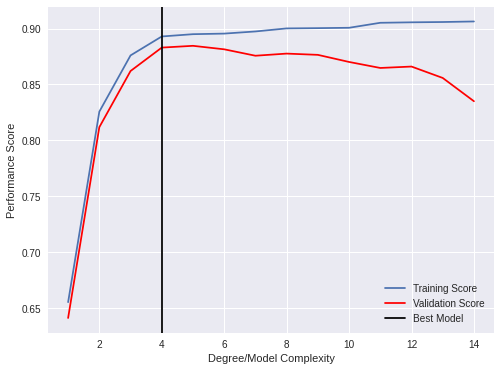

In [90]:
plt.figure(figsize=(8,6))

plt.plot(degree,tsm, label='Training Score')
plt.plot(degree,vsm, color='red',label='Validation Score')


plt.axvline(x=4,color='k', label='Best Model')


plt.legend()

plt.xlabel('Degree/Model Complexity')
plt.ylabel('Performance Score')




#The best model

In [92]:
m4 = PolyReg(4).fit(X_train,y_train)

yp4 = m4.predict(X_test)

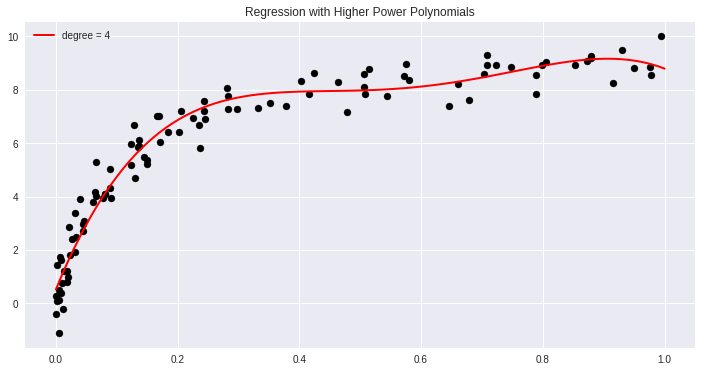

In [94]:
#Plotting
plt.figure(figsize=(12,6))
plt.style.use('seaborn')


plt.grid()
plt.scatter(X_train.ravel() , y_train, color='black')
# plt.plot(X_test.ravel() , yp1 , lw=2, label='degree = 1')
# plt.plot(X_test.ravel() , yp3 , lw=2, label='degree = 3')
# plt.plot(X_test.ravel() , yp5 , lw=2, label='degree = 5')
plt.plot(X_test.ravel() , yp4 , lw=2,color='red', label='degree = 4')



plt.title('Regression with Higher Power Polynomials')
plt.legend()
plt.grid()